<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow import keras

In [16]:
mnistDB=keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnistDB.load_data()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
y_test.shape

(10000,)

In [21]:
X_train=X_train.reshape((60000,28,28,1))

In [22]:
X_test=X_test.reshape((10000,28,28,1))

In [23]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [31]:
cnnModel_MNIST=keras.models.Sequential()


In [32]:
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=X_train.shape[1:]))
cnnModel_MNIST.add(keras.layers.Conv2D(32,(3,3),activation="relu"))
cnnModel_MNIST.add(keras.layers.MaxPooling2D((2,2)))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Flatten())
cnnModel_MNIST.add(keras.layers.Dense(128,activation="relu"))
cnnModel_MNIST.add(keras.layers.Dropout(0.25))
cnnModel_MNIST.add(keras.layers.Dense(10,activation="softmax"))

In [33]:
cnnModel_MNIST.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               589952    
                                                      

In [35]:
cnnModel_MNIST.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [36]:

history=cnnModel_MNIST.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1538 - accuracy: 0.9528 - val_loss: 0.0456 - val_accuracy: 0.9846
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9824 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0453 - accuracy: 0.9857 - val_loss: 0.0286 - val_accuracy: 0.9905
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0296 - val_accuracy: 0.9901
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.0322 - val_accuracy: 0.9903
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0306 - val_accuracy: 0.9906
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0302 - val_accuracy:

In [29]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 8.5 MB/s 


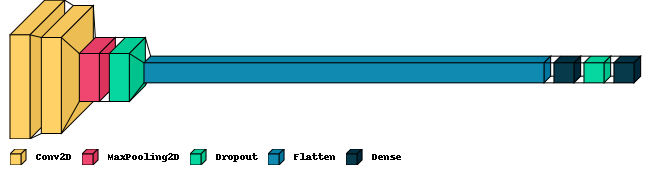

In [37]:
import visualkeras
visualkeras.layered_view(cnnModel_MNIST,legend=True)


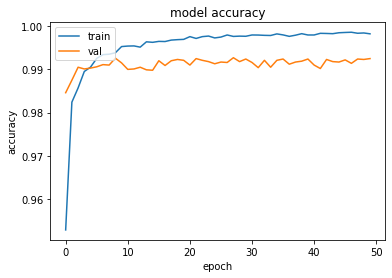

In [40]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

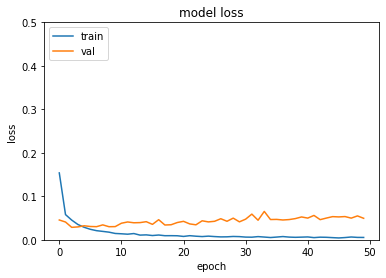

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,0.5)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
cnnModel_MNIST.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])